<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #1: ES models </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 
This is first laboratory task for the course TSA.
The Lab is desinged to impove skills of tuning parameters of ES models and get experience of coding of simple Regression Models.

The Lab should take about 5-6 hours to be completed.

<h1 align="center">Important Info</h1> 
- <span style="font-size: 14pt;"> You must send your solution to the email </span> <span style="color:red; font-size: 12pt;">alexromsput@gmail.com, </span>
- The theme of your message must be <span style="color:red; font-size: 12pt;"> TSA-Erevan-2017-[Your Surname] </span>, for exmaple -- TSA-Erevan-2017-Romanenko,
- The file in attachment of the letter must be named as <span style="color:red; font-size: 12pt;"> [Surname]-[Group]-Lab1.ipnb</span>, for example -- Romanenko-Evening-Lab1.ipnb,
  
<span style="color:red; font-size: 14pt;"> DEADLINE: 7 June 2017 23:59:59 </span>


<h1 align="center">1. Realization of ES models(50%)</h1>
Solve the task fo Prcatice Day 1 and put you solution (that means cells and outputs) below

<h1 align="center">2. Forecasting real TS (50%)</h1>

* I.   Download datasets (see Student ID in sheet 'Notes' <a href="https://drive.google.com/open?id=11-lzxxR0aeBmEDGEW1GiIaP4X3fyCTHxTg4b0wALpzs">here </a>) and put it into pandas Data Frame:
     - for those whose Student ID = 0 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> 
     - for those whose Student ID = 1 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> 
     - for those whose Student ID = 2 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>
     
<a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link to the folder with datasets</a>

Answer questions: are there TS with seaonality in data? which is the seasonality period?
(Hint: you just need to look at aggregate data by each shop).

* II. Define the beginning of the history and the end of the history of TS (for TS_dep36.csv the beginning is 12.05.2005, the end is 13.06.2006)
    
* III. For TS_dep36.csv Find the best ES algorithm (it means ES model + its optimal parameters) for each TS by next sheme:
     
     
     - 0) Use only following ES models: IES (see seminar 2), AES (see seminar 2), Winters with additive seasonality (see Practice Day 1 task 3), Theil-Wage (see Practice Day 1 task 4).
     
     
     - 1) forecasting delay $h = 1$, loss function is MACAPE;
     
     
     - 2) For all models find optimal params of each ES models using first 75% of dates (for TS_dep36.csv from 12.05.2005 to 12.03.2006);
     
     
     - 3) forecast each TS by each ES Model with optimal params using first 90% of dates (for TS_dep36.csv from 12.05.2005 to 30.04.2006);
     - 4) find the optimal ES algorithm: just compare losses of ES models with optimal params calclated for dates that were not used for tuning parameters (for TS_dev36.csv: from 13.03.2006 to 30.04.2006).
    
    You need to remember optimal ES algorithm for each TS!
    
     - 5) Build barchar (histogram) of losses of optimal ES algorithm (were calulated at step before) for all TS (axis x - value of loss, axis y - percentage of TS that have such loss). Here you must exclude those TS which has only NaNs in period under consideration.
            
* IV. Calculate Forecast for each TS by optimal TS algorithm that you find in step 3 for all dates (for TS_dep36.csv from 12.05.2005 to 13.06.2006). 

       
     - 1) Measure accuracy (loss) of forecast for each TS using dates that were not used in step 2)-3) (for TS_dep36.csv from 12.05.2005 to 12.03.2006), here you must exclude those TS which has only NaNs in the end.
    
     - 2) Build barchar (histogram) of losses of optimal ES algorithm for all TS (axis x - value of loss, axis y - percentage of TS that has such loss), here you must exclude those TS which has only NaNs in period under consideration.

     - 3) Are barcharts calculated in step III.4) and in step IV.2) the same? If they differ than say in what manner.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
ts = pd.read_csv('./data/TS_dep42.csv', delimiter=';', index_col='Timestamp', decimal='.', parse_dates=True)
ts

,item 558,item 834,item 883,item 1311,item 1396,item 1647,item 1689,item 1761,item 1969,item 2036,...,item 77539,item 79279,item 80510,item 82356,item 87639,item 88121,item 89103,item 89977,item 95417,item 96668
Timestamp,,,,,,,,,,,,,,,,,,,,,
2005-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-11-10,0.992568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


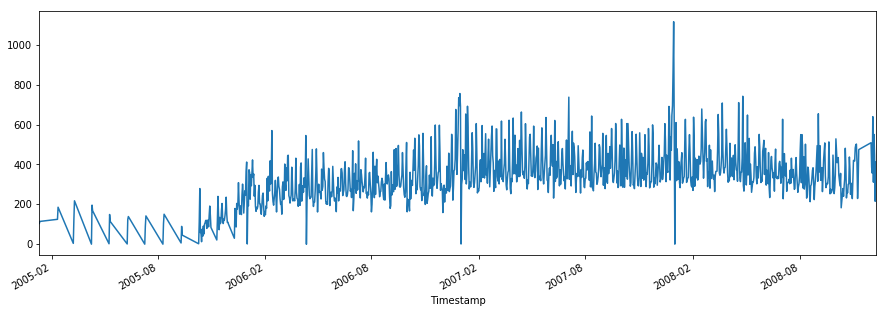

In [3]:
sm_ts = ts.sum(axis=1)
sm_ts.plot(figsize=(15, 5))
plt.show()

/home/david/miniconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


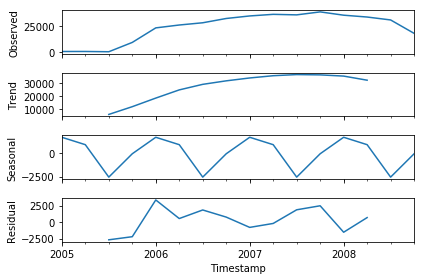

In [4]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(sm_ts.resample('Q').sum())
res.plot()
plt.show()

#### Out data has yearly seasonality

The time series are given in interval of 2005-03-10 2008-10-11. The 75% of time series is from 2005-03-10 to 2008-01-31. 
The 90% of time series is from 2005-03-10 to 2008-07-19

Our ES Models are

In [5]:
def InitExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = np.array([np.NaN]*(T+h))
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    t0=0
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha)*(t-t0+1)/(AdaptationPeriod) + (1-(1-alpha)*(t-t0+1)/(AdaptationPeriod))*x[t]
            else:
                y = y*(1-alpha) + alpha*x[t]
            #else do not nothing
        FORECAST[t+h] = y
    return FORECAST

In [6]:
def AdaptiveExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = np.array([np.NaN]*(T+h))
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = np.NaN
    t0= np.NaN
    e1= np.NaN
    e2= np.NaN
    Kt_1 = alpha
    K=alpha
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
                e1=alpha
                e2 = 1
            else:
                if (t-t0)<h:
                    e1 = gamma*(x[t]-y)+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-y)+(1-gamma)*e2
                else:
                    e1 = gamma*(x[t]-FORECAST[t])+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-FORECAST[t])+(1-gamma)*e2
            
            if e2==0:
                K=alpha
            else:
                K=np.abs(e1/e2)

            alpha=Kt_1
            Kt_1=K

            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha)*(t-t0+1)/(AdaptationPeriod) + (1-(1-alpha)*(t-t0+1)/(AdaptationPeriod))*x[t]
            else:
                y = y*(1-alpha) + (alpha)*x[t]
        FORECAST[t+h] = y
    return FORECAST

In [7]:
def TheilWageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    beta = Params['beta']
    p = Params['seasonality_period']
    
    FORECAST = np.array([np.NaN]*(T+h))
    
    l=x[0]
    b=0
    s=np.array([.0] * p)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr] 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= 0
            
            l_1 = l
            b_1 = b
            l = alpha * (x[cntr] - s[cntr % p]) + (1 - alpha) * (l_1 + b_1)
            b = beta * (l - l_1) + (1 - beta) * b_1
            s[cntr%p] = delta * (x[cntr] - l) + (1 - delta) * s[cntr % p]
            
        FORECAST[cntr+h] = l + b * h + s[(cntr+h) % p]
    return FORECAST

In [8]:
def HoltWintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = np.array([np.NaN]*(T+h))
    
    l=x[0]
    s=np.array([1.0] * p)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr] 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= 0
            
            l_1 = l
            l = alpha * (x[cntr] / s[cntr % p]) + (1 - alpha) * l_1
            s[cntr%p] = delta * (x[cntr] / l) + (1 - delta) * s[cntr % p]
            
        FORECAST[cntr+h] = l * s[(cntr+h) % p]
    return FORECAST

In [9]:
h = 1
def qualityMACAPE(x,y):
    qlt = np.abs((2*(x-y))/(np.abs(x+y) + 1e-9)).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

In [10]:
FUNCTIONS = [InitExponentialSmoothing, AdaptiveExponentialSmoothing, TheilWageExponentialSmoothing, HoltWintersExponentialSmoothing]

In [11]:
del ts['item 21190']
del ts['item 96668']
train_ts = ts[:'2008-01-31']
valid_ts = ts[:'2008-07-19']
def_param = {'alpha': 0, 'beta': 0, 'gamma': 0, 'delta': 0, 'AdaptationPeriod': 10, 'seasonality_period': 365}

In [12]:
from sklearn.grid_search import ParameterGrid

FUNPARAMS = [
    {'fun': InitExponentialSmoothing, 
     'params': ParameterGrid({'alpha': np.arange(0.1, 0.5, 0.05), 
                              'AdaptationPeriod': [10, 20]})},
    {'fun': AdaptiveExponentialSmoothing, 
     'params': ParameterGrid({'alpha': np.arange(0.1, 0.5, 0.05), 
                              'gamma': np.arange(0.1, 1.0, 0.15), 
                              'AdaptationPeriod': [10, 20]})},
    {'fun': TheilWageExponentialSmoothing, 
     'params': ParameterGrid({'alpha': np.arange(0.1, 0.5, 0.05), 
                              'beta': np.arange(0.1, 1.0, 0.15), 
                              'delta': np.arange(0.1, 1.0, 0.15), 
                              'seasonality_period': [365]})},
    {'fun': HoltWintersExponentialSmoothing, 
     'params': ParameterGrid({'alpha': np.arange(0.1, 0.5, 0.05), 
                              'delta': np.arange(0.1, 1.0, 0.15), 
                              'seasonality_period': [365]})}
]

/home/david/miniconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/david/miniconda3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [13]:
def best_param_for_function(ts, fun, params):
    ret = {}
    ix = range(len(ts.index))
    for col in ts.columns:
        print(col)
        ret[col] = {'q':1e10, 'param': def_param}
        for param in params:
            q,_ = qualityMACAPE(ts[col].iloc[ix], fun(ts[col], h, param)[:-1])
            if ret[col]['q'] > q:
                ret[col] = {'q': q, 'param': param}
    return ret

In [14]:
def get_params(ts, functions, params):
    ret = list()
    for fun in functions:
        p = best_param_for_function(ts, fun, params)
        ret.append({'fun': fun, 'params': p})
    return ret

In [15]:
def get_best_params(ts, params):
    ret = {}
    for c in ts.columns:
        ret[c] = {'q': 1e10}
    for elem in params:
        fun = elem['fun']
        params = elem['params']
        for col in params:
            param = params[col]['param']
            pred = fun(ts[col], h, param)[:-1]
            ts_t = ts['2008-01-31':]
            ix = range(len(ts_t.index))
            q, _ = qualityMACAPE(ts_t[col].iloc[ix], pred[len(ts)-len(ts_t):])
            if ret[col] is None or ret[col]['q'] > q:
                ret[col] = {'fun': fun, 'param': param, 'q': q}
    return ret

In [16]:
def get_params_for_functions(ts, funparams):
    ret = list()
    for elem in funparams:
        fun = elem['fun']
        params = elem['params']
        p = best_param_for_function(ts, fun, params)
        ret.append({'fun': fun, 'params': p})
    return ret

In [17]:
best_params_for_functions = get_params_for_functions(train_ts, FUNPARAMS)

item 558
item 834
item 883
item 1311
item 1396
item 1647
item 1689
item 1761
item 1969
item 2036
item 2238
item 2697
item 2826
item 7968
item 8670
item 9018
item 9626
item 10113
item 10654
item 10864
item 11402
item 11865
item 13233
item 13461
item 14157
item 14202
item 14435
item 14475
item 14679
item 14870
item 15109
item 15141
item 15325
item 15342
item 15405
item 15925
item 16460
item 16530
item 17254
item 17273
item 17275
item 17277
item 17304
item 17314
item 17746
item 18071
item 18495
item 19810
item 19811
item 19812
item 20004
item 20076
item 20186
item 20213
item 21061
item 21064
item 21066
item 21251
item 21529
item 21530
item 21761
item 22291
item 22476
item 23384
item 23600
item 24771
item 24864
item 24991
item 25386
item 25626
item 25841
item 26452
item 26785
item 26890
item 27063
item 28079
item 28090
item 29362
item 29726
item 29941
item 30655
item 32337
item 32345
item 32964
item 34077
item 34121
item 34122
item 34631
item 34824
item 34893
item 35057
item 37213
item 374

/home/david/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/david/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/home/david/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


item 1647
item 1689
item 1761
item 1969
item 2036
item 2238
item 2697
item 2826
item 7968
item 8670
item 9018
item 9626
item 10113
item 10654
item 10864
item 11402


/home/david/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


item 11865
item 13233
item 13461
item 14157
item 14202
item 14435
item 14475
item 14679
item 14870
item 15109
item 15141
item 15325
item 15342
item 15405
item 15925
item 16460
item 16530
item 17254
item 17273
item 17275
item 17277
item 17304
item 17314
item 17746
item 18071
item 18495
item 19810
item 19811
item 19812
item 20004
item 20076
item 20186
item 20213
item 21061
item 21064
item 21066
item 21251
item 21529
item 21530
item 21761
item 22291
item 22476
item 23384
item 23600
item 24771
item 24864
item 24991
item 25386
item 25626
item 25841
item 26452
item 26785
item 26890
item 27063
item 28079
item 28090
item 29362
item 29726
item 29941
item 30655
item 32337
item 32345
item 32964
item 34077
item 34121
item 34122
item 34631
item 34824
item 34893
item 35057
item 37213
item 37469
item 37594
item 37876
item 38007
item 38406
item 38415
item 39222
item 39369
item 40085
item 41004
item 41560
item 41784
item 41994
item 41995
item 42079
item 42356
item 42793
item 43639
item 43809
item 44115

In [18]:
best_params = get_best_params(valid_ts, best_params_for_functions)

/home/david/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/david/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/home/david/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/home/david/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


In [19]:
def extract_loses(params):
    ret = []
    for p in params:
        ret.append(params[p]['q'])
    return ret

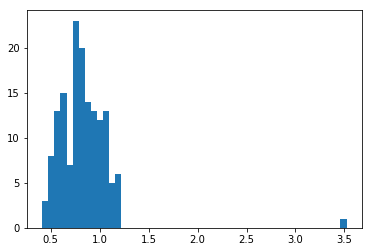

In [26]:
losses = extract_loses(best_params)
plt.hist(losses, bins=50)
plt.show()

In [21]:
def accuracy_list(ts, params):
    print(ts.shape)
    ret = []
    for p in params:
        elem = params[p]
        fun = elem['fun']
        param = elem['param']
        
        pred = fun(ts[p], h, param)[:-1]
        ts_t = ts['2008-07-20':]
        ix = range(len(ts_t.index))
        q, _ = qualityMACAPE(ts_t[p].iloc[ix], pred[len(ts)-len(ts_t):])
        ret.append(q)
    return ret

(1135, 153)


/home/david/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/david/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/home/david/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/home/david/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


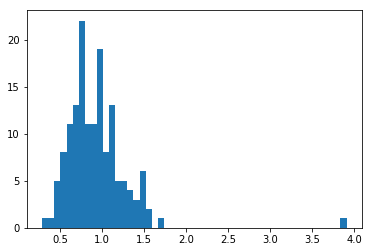

In [38]:
accuracies = accuracy_list(ts, best_params)
plt.hist([value for value in accuracies if not math.isnan(value)], bins=50)
plt.show()